In [1]:
import numpy as np
import pandas as pd

dataOther = []
#Maturity Group (MG), Genotype ID, State, Year, and Location for each performance record
dataOther = np.load('inputs_others_train.npy')
dataClean = []
#3 4
tmp = []
#df = pd.DataFrame(dataOther,  columns = ['MG', 'GID', 'state', 'Year', 'PR'])
#print(df.describe())
#clean data of doubles and extra tags
for i in range(len(dataOther)):
    tmp.append(dataOther[i].tolist())
    a = tmp[i][3]
    b = tmp[i][4]
    c = tmp[i][1]
    d = tmp[i][2]
    e = tmp[i][0]
    d = d.replace("\"","")
    tmp[i][3] = float(a)
    tmp[i][4] = float(b)
    tmp[i][1] = float(c)
    tmp[i][0] = float(e)
    tmp[i][2] = d
df = pd.DataFrame(tmp,  columns = ['MG', 'GID', 'state', 'Year', 'PR'])
dataYield = []
dataYield = np.load('yield_train.npy')
dfY = pd.DataFrame(dataYield)
#add yield vaules to dataframe
df.insert(5,"yield", dfY[0])

#print(df.describe())

#remove all mg values less than zero
#df2 = df[df['MG'] > -1]

print(df.describe())
df.head(15)
df.shape

                 MG           GID          Year            PR         yield
count  93028.000000  93028.000000  93028.000000  93028.000000  93028.000000
mean       3.275283   2724.313443   2008.703605     89.072688     50.664638
std        2.170600   1667.758824      3.646936     47.669708     15.954265
min       -1.000000      1.000000   2003.000000      1.000000      0.400000
25%        2.000000   1251.000000   2006.000000     50.000000     39.800000
50%        3.000000   2630.000000   2008.000000     99.000000     50.600000
75%        5.000000   4062.000000   2012.000000    134.000000     61.400000
max        8.000000   5839.000000   2015.000000    167.000000    112.400000


(93028, 6)

In [2]:
dataWeather = []

dataWeather = np.load('inputs_weather_train.npy')
print(dataWeather[0][0].tolist())
print(dataWeather[0][1])

dayOne = []
#dfw = pd.DataFrame(columns = ['AP','ARH','MDNI','MxSur','MnSur','MnSur','AgSur'])
type(dataWeather[1][1])


for i in range(214):
    dayOne.append(dataWeather[0][i].tolist())
    #dfw.append(pd.DataFrame((dataWeather[i][0].tolist()) ,columns = ['AP','ARH','MDNI','MxSur','MnSur','MnSur','AgSur']))
dfw = pd.DataFrame(dayOne,columns = ['ADNI','AP','ARH','MDNI','MxSur','MnSur','AgSur'])
dfw.head(15)
#dfw.shape

weatherRebuild = []

for i in range(len(dataWeather)):
    dayArray = []
    dayArray = dataWeather[i]
    #day = pd.DataFrame(dayArray)
    sumArray = np.mean(dayArray,axis = 0)
    weatherRebuild.append(sumArray)

newDf = pd.DataFrame(weatherRebuild,columns = ['avg_ADNI','avg_AP','avg_ARH','avg_MDNI','avg_MxSur','avg_MnSur','avg_AgSur'])
newDf.head(15)

[169.88, 0.0, 50.5, 814.0, 57.3, 32.3, 43.23]
[1.254e+01 1.000e-02 8.475e+01 9.300e+01 5.130e+01 3.660e+01 4.385e+01]


,avg_ADNI,avg_AP,avg_ARH,avg_MDNI,avg_MxSur,avg_MnSur,avg_AgSur
0,219.413598,0.005514,71.431495,718.663551,76.147196,56.356075,65.135911
1,208.647336,0.007056,77.015374,709.140187,79.164019,59.681776,68.427944
2,233.999159,0.004393,71.552991,761.976636,81.725701,56.253738,67.829182
3,229.848037,0.006402,72.475654,749.700935,75.406075,55.709346,64.451192
4,243.310561,0.004346,61.584346,761.682243,78.586449,55.899065,65.753294
5,248.021729,0.004299,67.229673,770.845794,81.901402,60.434579,69.843154
6,224.483832,0.008972,78.895187,777.953271,84.593925,64.597664,73.201822
7,265.775748,0.002991,55.085888,824.504673,81.865888,57.840654,68.269369
8,247.904486,0.003178,61.926402,820.084112,88.864019,64.868692,75.545701
9,191.043879,0.005794,76.994720,637.088785,67.734579,49.625701,57.997103


In [3]:
weatherAndYields = pd.concat([df,newDf], axis=1)
weatherAndYields.head(15)

,MG,GID,state,Year,PR,yield,avg_ADNI,avg_AP,avg_ARH,avg_MDNI,avg_MxSur,avg_MnSur,avg_AgSur
0,3.0,243.0,KS,2009.0,98.0,39.0,219.413598,0.005514,71.431495,718.663551,76.147196,56.356075,65.135911
1,6.0,114.0,AL,2013.0,16.0,54.2,208.647336,0.007056,77.015374,709.140187,79.164019,59.681776,68.427944
2,4.0,2878.0,TN,2015.0,72.0,73.6,233.999159,0.004393,71.552991,761.976636,81.725701,56.253738,67.829182
3,3.0,4535.0,MO,2014.0,94.0,70.9,229.848037,0.006402,72.475654,749.700935,75.406075,55.709346,64.451192
4,3.0,4501.0,NE,2008.0,45.0,82.1,243.310561,0.004346,61.584346,761.682243,78.586449,55.899065,65.753294
5,6.0,1018.0,SC,2005.0,36.0,42.5,248.021729,0.004299,67.229673,770.845794,81.901402,60.434579,69.843154
6,8.0,1544.0,AL,2013.0,51.0,64.0,224.483832,0.008972,78.895187,777.953271,84.593925,64.597664,73.201822
7,1.0,3846.0,NE,2010.0,102.0,96.1,265.775748,0.002991,55.085888,824.504673,81.865888,57.840654,68.269369
8,8.0,1597.0,SC,2011.0,20.0,50.6,247.904486,0.003178,61.926402,820.084112,88.864019,64.868692,75.545701
9,-1.0,4286.0,QUE,2008.0,133.0,85.0,191.043879,0.005794,76.994720,637.088785,67.734579,49.625701,57.997103


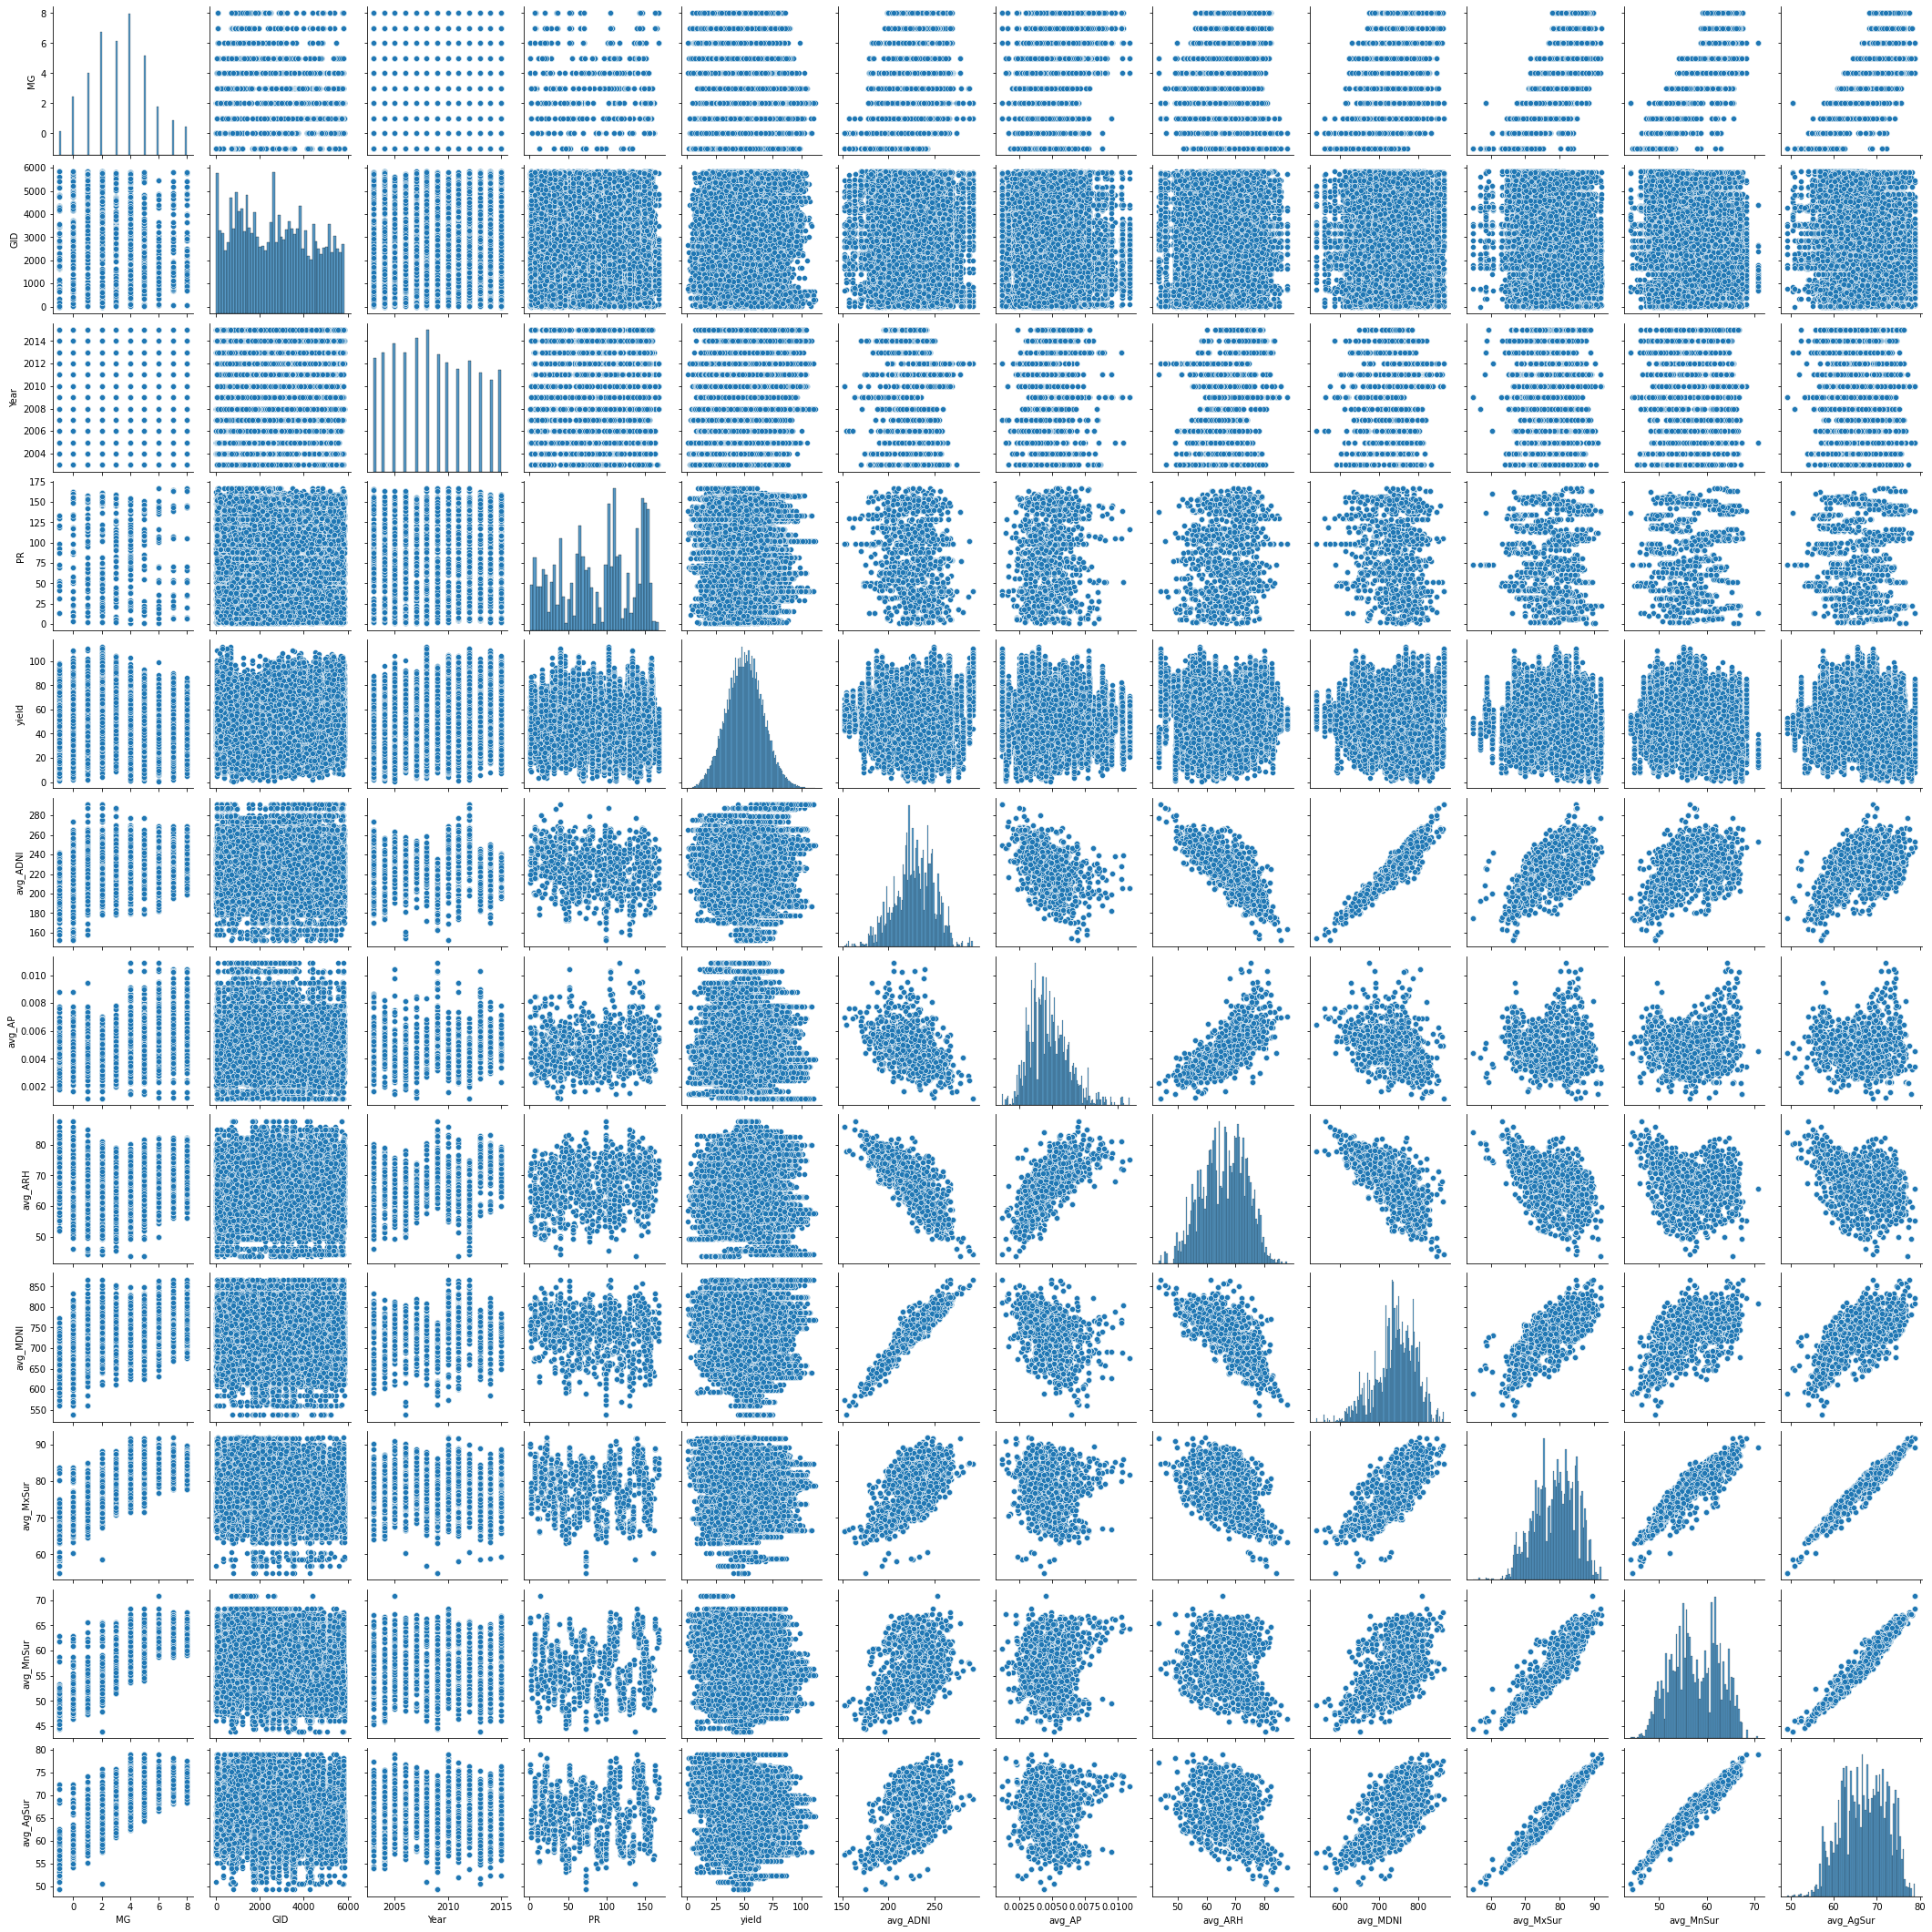

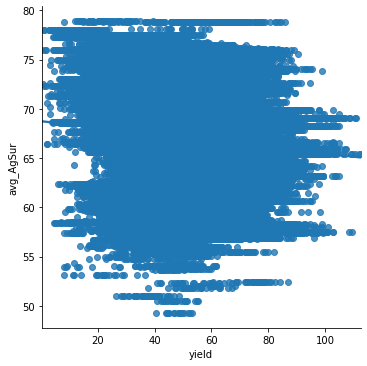

In [4]:
import seaborn as sns
sns.pairplot(weatherAndYields)
g = sns.lmplot(x='yield', y='avg_AgSur', data = weatherAndYields)

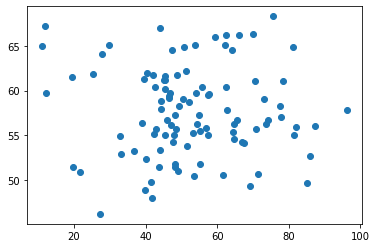

In [5]:
firstH = weatherAndYields.head(100)
firstH.head(15)
import matplotlib.pyplot as plt
plt.scatter(firstH['yield'],firstH['avg_MnSur'])
plt.show()

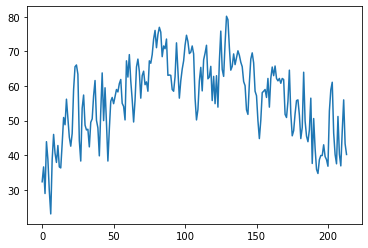

In [13]:
import matplotlib.pyplot as plt
plt.plot(dfw['MnSur'])
plt.show()

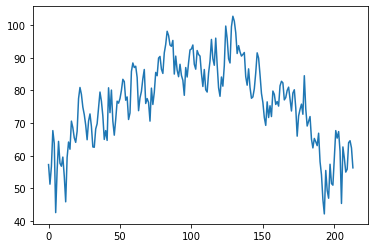

In [7]:
plt.plot(dfw['MxSur'])
plt.show()

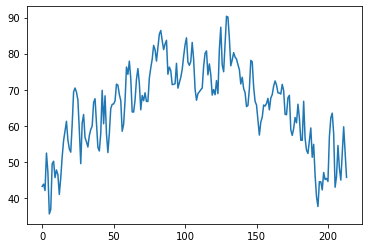

In [8]:
plt.plot(dfw['AgSur'])
plt.show()

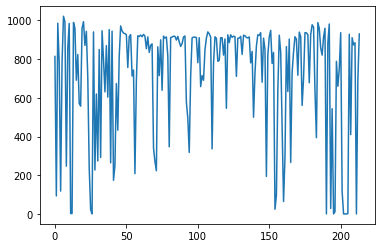

In [9]:
plt.plot(dfw['MDNI'])
plt.show()

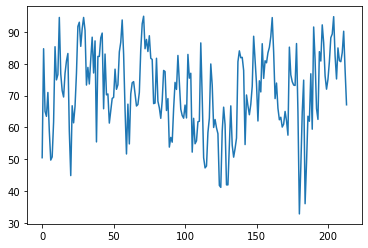

In [10]:
plt.plot(dfw['ARH'])
plt.show()

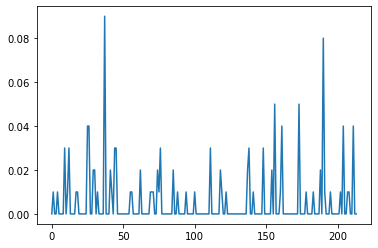

In [11]:
plt.plot(dfw['AP'])
plt.show()

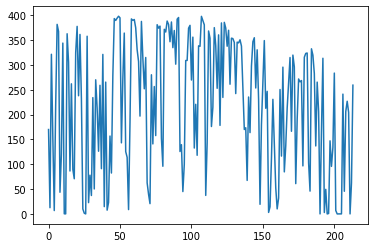

In [12]:
plt.plot(dfw['ADNI'])
plt.show()